In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as p
from xgboost import XGBClassifier

# Collecting data

In [2]:
###Loading a data into a dataframe
data = pd.read_csv('full_data.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [17]:
data.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [16]:
print('Gender Types: ', data.gender.unique())
print('Age: ', data.gender.unique())
print('Hypertension: ', data.hpertension.unique())
print('Heart_Disease: ', data.heart_disease.unique())
print('Ever Married Types: ', data.ever_married.unique())
print('Work Types: ', data.work_type.unique())
print('Residence Types: ', data.Residence_type.unique())
#print('Avg_Gulcose level:' data.avg_glucose_level.unique())
print('Smoking Status Types: ', data.smoking_status.unique())


Gender Types:  ['Male' 'Female']
Age:  ['Male' 'Female']


AttributeError: 'DataFrame' object has no attribute 'hpertension'

In [3]:
# shape
print(data.shape)

(4981, 11)


# Data clenaing

In [3]:
#Clean the data
data.isnull().sum().max()

0

In [5]:
#Check the dublicate values
data.duplicated().sum()

0

# Exploaratory analysis

In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


<AxesSubplot:>

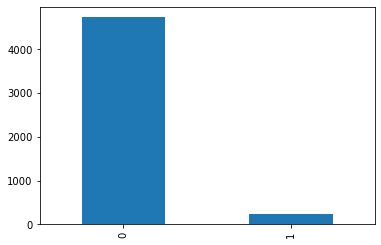

In [7]:
data['stroke'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Count Of Patients')

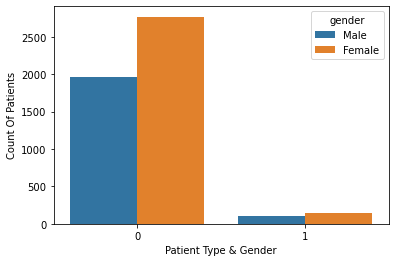

In [8]:
sns.countplot(x = 'stroke',hue = 'gender',data = data)

plt.xlabel("Patient Type & Gender")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count by Gender')

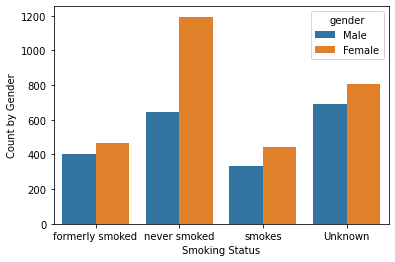

In [9]:
sns.countplot(x = 'smoking_status', hue = 'gender'
            ,data = data)

plt.xlabel("Smoking Status")
plt.ylabel("Count by Gender")

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

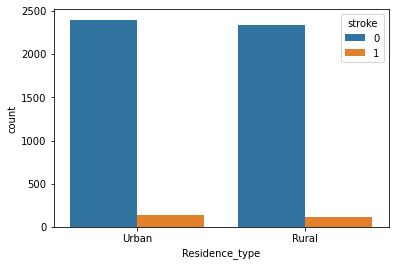

In [10]:
sns.countplot(x='Residence_type', data=data, hue='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

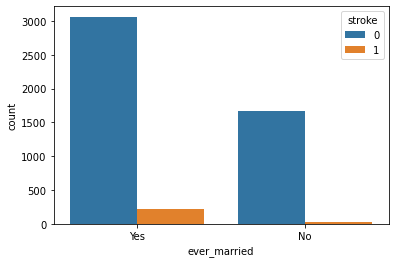

In [11]:
sns.countplot(x='ever_married', data=data, hue='stroke')

<AxesSubplot:xlabel='work_type', ylabel='count'>

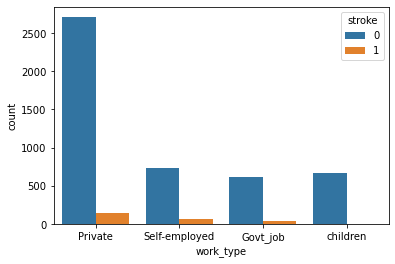

In [12]:
data['work_type'].value_counts()
sns.countplot(x='work_type', data=data, hue='stroke')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

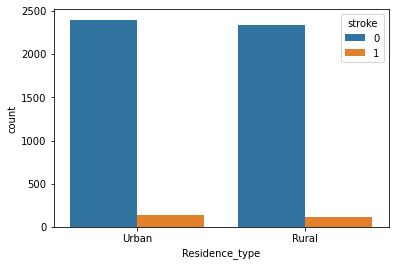

In [13]:
data['Residence_type'].value_counts()
sns.countplot(x='Residence_type', data=data, hue='stroke')

# NUMERICAL VISUALIZATION

# Bivariate analysis for stroke

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

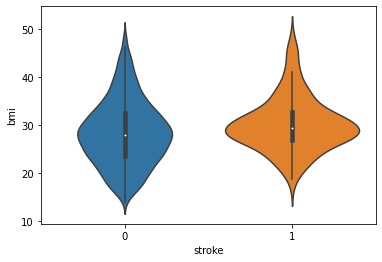

In [4]:
sns.violinplot(x="stroke",y='bmi',data=data)

# Preparing Data

In [4]:



print('Gender Types: ', data.gender.unique())
print('Ever Married Types: ', data.ever_married.unique())
print('Work Types: ', data.work_type.unique())
print('Residence Types: ', data.Residence_type.unique())
print('Smoking Status Types: ', data.smoking_status.unique())
print('Avg_Gulcose level:' data.gender.unique())


print('Gender Types: ', data.gender.unique())
print('Ever Married Types: ', data.ever_married.unique())
print('Work Types: ', data.work_type.unique())
print('Residence Types: ', data.Residence_type.unique())
print('Smoking Status Types: ', data.smoking_status.unique()))

SyntaxError: invalid syntax (<ipython-input-4-bf0d9213cf1d>, line 1)

In [6]:

data['gender'] = data['gender'].replace('Male',0)
data['gender'] = data['gender'].replace('Female',1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,0,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,1,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,0,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
data['ever_married'] = data['ever_married'].replace('Yes',0)
data['ever_married'] = data['ever_married'].replace('No',1)

In [6]:
data['work_type'] = data['work_type'].replace('Private',0)
data['work_type'] = data['work_type'].replace('Self-employed',1)
data['work_type'] = data['work_type'].replace('Govt_job',2)
data['work_type'] = data['work_type'].replace('children',3)

In [7]:
data['Residence_type'] = data['Residence_type'].replace('Urban',0)
data['Residence_type'] = data['Residence_type'].replace('Rural',1)

In [8]:
data['smoking_status'] = data['smoking_status'].replace('formerly smoked',0)
data['smoking_status'] = data['smoking_status'].replace('never smoked',1)
data['smoking_status'] = data['smoking_status'].replace('smokes',2)
data['smoking_status'] = data['smoking_status'].replace('Unknown',3)

In [13]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [14]:
# Separating Data
X=data.drop(['stroke'],axis=1)
y=data['stroke']


from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='386'

data_stroke0 = resample(data[data['stroke']=='0'],
               replace=True,
               n_samples=4733,
               random_state=4233)

data_stroke1 = resample(data[data['stroke']=='1'],
               replace=True,
               n_samples=4733,
               random_state=4233)

data_upsampled = pd.concat([data_stroke0, data_stroke1])


# Display new class counts

data_upsampled['stroke'].value_counts()

In [15]:

# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0
1,0,80.0,0,1,0,0,1,105.92,32.5,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2
3,1,79.0,1,0,0,1,1,174.12,24.0,1
4,0,81.0,0,0,0,0,0,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,1,0,1,70.15,29.8,0
4977,0,40.0,0,0,0,0,0,191.15,31.1,2
4978,1,45.0,1,0,0,2,1,95.02,31.8,2
4979,0,40.0,0,0,0,0,1,83.94,30.0,2


In [16]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3486, 10)
(3486,)
(1495, 10)
(1495,)


In [17]:
y_train.value_counts()

0    3303
1     183
Name: stroke, dtype: int64

Imblance with train set

In [14]:
#Scaling X data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='not majority',k_neighbors=5)
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)
print("size of new training data after smote")
print(X_train_smote.shape)
print(y_train_smote.shape)
print("Class distribution after smote")
print(y_train_smote.value_counts())

size of new training data after smote
(6606, 10)
(6606,)
Class distribution after smote
1    3303
0    3303
Name: stroke, dtype: int64


# Data modeling

In [16]:
X_train

array([[-1.17660738,  0.90973198, -0.32820975, ...,  1.81294718,
         0.56002767, -0.54289828],
       [ 0.84990118, -0.50019885, -0.32820975, ..., -0.06628605,
        -0.272946  ,  0.37049139],
       [-1.17660738, -0.19177648, -0.32820975, ..., -0.38442918,
         0.85229913, -0.54289828],
       ...,
       [ 0.84990118,  0.55724927, -0.32820975, ...,  2.62566028,
         2.09445285, -0.54289828],
       [-1.17660738,  0.60130961, -0.32820975, ...,  0.0358558 ,
         0.15084762, -0.54289828],
       [ 0.84990118, -1.51358663, -0.32820975, ..., -0.34596017,
        -1.42741827,  1.28388107]])

In [17]:
###KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_smote, y_train_smote)
y_pred = classifier.predict(X_test)
###Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1132  298]
 [  44   21]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1430
           1       0.07      0.32      0.11        65

    accuracy                           0.77      1495
   macro avg       0.51      0.56      0.49      1495
weighted avg       0.92      0.77      0.84      1495



In [18]:
GB = GaussianNB()
GB.fit(X_train_smote, y_train_smote)
predictions = GB.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7076923076923077
[[1006  424]
 [  13   52]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1430
           1       0.11      0.80      0.19        65

    accuracy                           0.71      1495
   macro avg       0.55      0.75      0.51      1495
weighted avg       0.95      0.71      0.79      1495



In [19]:
LR=LogisticRegression()
LR.fit(X_train_smote, y_train_smote)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7237458193979933
[[1030  400]
 [  13   52]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1430
           1       0.12      0.80      0.20        65

    accuracy                           0.72      1495
   macro avg       0.55      0.76      0.52      1495
weighted avg       0.95      0.72      0.81      1495



In [20]:
RF=RandomForestClassifier()
RF.fit(X_train_smote, y_train_smote)
predictions = RF.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.9177257525083612
[[1368   62]
 [  61    4]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1430
           1       0.06      0.06      0.06        65

    accuracy                           0.92      1495
   macro avg       0.51      0.51      0.51      1495
weighted avg       0.92      0.92      0.92      1495



In [21]:
XGB=XGBClassifier()
XGB.fit(X_train_smote, y_train_smote)
predictions = XGB.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


C:\Users\pushp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9317725752508361
[[1386   44]
 [  58    7]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1430
           1       0.14      0.11      0.12        65

    accuracy                           0.93      1495
   macro avg       0.55      0.54      0.54      1495
weighted avg       0.92      0.93      0.93      1495



# Decision Tree model

In [22]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [23]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train_smote, y_train_smote)}')

Decision tree has 1003 nodes with maximum depth 26.
Model Accuracy: 1.0


In [24]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1430
           1       0.08      0.18      0.11        65

    accuracy                           0.87      1495
   macro avg       0.52      0.54      0.52      1495
weighted avg       0.92      0.87      0.89      1495



In [26]:
print(confusion_matrix(y_test, predictions))

[[1386   44]
 [  58    7]]


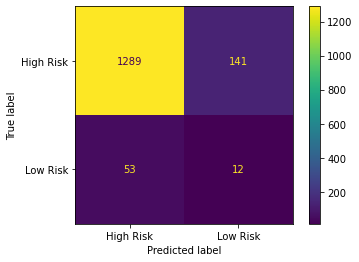

In [27]:

cm=confusion_matrix(y_test, y_pred)
cmf =ConfusionMatrixDisplay(cm,display_labels=('High Risk','Low Risk'))
cmf.plot()